In [ ]:
import pandas as pd
import numpy as np
from scipy.io import arff
import tensorflow
from tensorflow import keras
import sys
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, GlobalMaxPooling1D
from keras.layers import BatchNormalization, ReLU
import tensorflow.keras.optimizers

In [ ]:

data_test = pd.read_csv("C:\\Users\\YongGyu\\OneDrive - 한국산업기술대학교\\문서\카카오톡 받은 파일\\FordB_TEST.csv")
data_train = pd.read_csv("C:\\Users\\YongGyu\\OneDrive - 한국산업기술대학교\\문서\카카오톡 받은 파일\\ford_b_train_normalization.csv")

x_train_temp = data_train.iloc[:,:-1]
y_train_temp = data_train.iloc[:,-1]
y_test = data_test.iloc[:,:-1]
y_test = data_test.iloc[:,-1]

x_train_temp.head()

n_x = x_train_temp[y_train_temp == 1]
an_x = x_train_temp[y_train_temp == 0]
n_y = y_train_temp[y_train_temp == 1]
an_y = y_train_temp[y_train_temp == 0]

ind_nx = int(n_x.shape[0]*0.8)
ind_ny = int(n_y.shape[0] * 0.8)
ind_anx = int(an_x.shape[0] * 0.8)
ind_any = int(an_y.shape[0] * 0.8)

x_train = np.concatenate((n_x[:ind_nx], an_x[:ind_anx]), axis = 0)
x_valid = np.concatenate((n_x[:ind_nx], an_x[:ind_anx]), axis = 0)
y_train = np.concatenate((n_y[:ind_ny], an_y[:ind_any]), axis = 0)
y_valid = np.concatenate((n_y[:ind_ny], an_y[:ind_any]), axis = 0)

x_test = data_test.iloc[:,:-1]
y_test = data_test.iloc[:,-1]


In [ ]:
import random

labels = np.unique(np.concatenate((y_train, y_test), axis = 0))

plt.figure(figsize = (10, 4))

for c in labels:
  x_train_n = x_train[y_train == c]
  if c == -1 : c = c+1
  t = random.randint(0, x_train_n.shape[0])
  plt.scatter(range(0, 500), x_train_n[t], label ='class' + str(int(c)), marker = 'o', s=5)

plt.legend(loc='lower right')
plt.xlabel("sensor", fontsize = 15)
plt.ylabel("sensor value", fontsize = 15)
plt.show()

In [ ]:
num = random.randint(0,500)
plt.figure(figsize = (15, 8))
plt.plot(x_train[:, num])
plt.title("sensor : {}".format(num))
plt.xlabel("Time")
plt.ylabel("sensor value")
plt.show()

In [ ]:
time_t = random.randint(0, x_train_n.shape[0])
plt.scatter(range(0, x_train_n.shape[1]), x_train_n[338],
            marker = 'o',s=5, c='b')

plt.title("time : {}".format(338))
plt.xlabel("sensor")
plt.ylabel("sensor value")
plt.show()

In [ ]:
sns.countplot(x=y_train).set(ylim=(0,1500))

In [ ]:
sns.countplot(x=y_valid).set(ylim=(0,1500))

In [ ]:
sns.countplot(x=y_test).set(ylim=(0,1500))

In [ ]:
"""
corr_df = X.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

pd.options.display.max_rows = 60
pd.options.display.max_columns = 20
"""


In [ ]:
"""
y_train[y_train == 0] = 0
y_valid[y_valid == 0] = 0
y_test[y_test == 0] = 0

y_train[y_train == 1] = 1
y_valid[y_valid == 1] = 1
y_test[y_test == 1] = 1
"""

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(x_train)

x_train = std.transform(x_train)
x_valid = std.transform(x_valid)

x_train.shape
x_train

std = StandardScaler()
std.fit(x_test)

x_test = std.transform(x_test)

In [ ]:
x_train_c = np.expand_dims(x_train, -1)
x_valid_c = np.expand_dims(x_valid, -1)
x_test_c = np.expand_dims(x_test, -1)


In [ ]:
y_train = y_train.astype(np.float32)
y_valid = y_valid.astype(np.float32)
y_test = y_test.astype(np.float32)

In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import GridSearchCV, train_test_split

 
model = Sequential()

model.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(ReLU())

model.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(ReLU())

model.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(ReLU())

model.add(GlobalMaxPooling1D())
model.add(Dense(2, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience = 50, verbose = 1)
model_checkpoint = ModelCheckpoint(filepath='./{epoch}-{val_loss:.2f}-{val_sparse_categorical_accuracy:.2f}', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lronplateau = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 20, min_lr = 0.00001)



In [ ]:
history = model.fit(x_train_c, y_train,
                    batch_size = 64,
                    epochs = 100,
                    callbacks=[early_stopping, model_checkpoint],
                    validation_data = (x_valid_c, y_valid), verbose = 1)


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(x_valid_c, y_valid)

In [ ]:
y_test_ndarray = y_test.to_numpy() 
scores = model.evaluate(x_test_c, y_test_ndarray)

print('Test Acc', scores[1])
print('Test Loss', scores[0])
print(model.metrics_names[1], scores[1]*100)

42/42 [==============================] - 0s 7ms/step


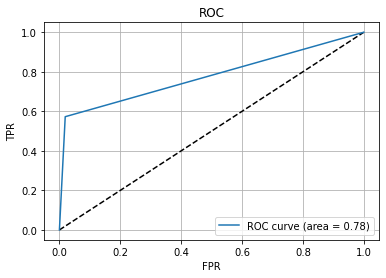

In [25]:
from sklearn.metrics import roc_curve, auc

predict_prob = model.predict(x_test_c)
predict_classes = np.argmax(predict_prob, axis = 1)

fprs, tprs, thredshold = roc_curve(y_test, predict_classes)
roc_auc = auc(fprs,tprs)

precisions, recalls, thredsholds = roc_curve(y_test, predict_classes)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fprs, tprs, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
acc = accuracy_score(y_test, predict_classes)
print('accuracy_score : ',acc)

print(classification_report(y_test, predict_classes))

In [ ]:
from pandas.core.frame import itertools
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, predict_classes)
ax = sns.heatmap(cf_matrix, annot=True, fmt='d',)
ax.set_xlabel("Predicted Diagnosis", fontsize = 14, labelpad = 20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_ylabel("Actual Diagnosis", fontsize = 14, labelpad = 20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_title("Confusion Matrix", fontsize = 14, pad = 20)

In [ ]:
print(cf_matrix)